## Results of Cartpole Simulations

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [61]:
results_dir = 'results'
subdir = 'CartPole-BT-dL-v0'
os.listdir(results_dir)

['CartPole-BT-v0', '.DS_Store', 'CartPole-BT-vH-v0', 'CartPole-BT-dL-v0']

In [62]:
filename = 'param_sweep_results.csv'
filepath = os.path.join(results_dir, subdir, filename)
results = pd.read_csv(filepath, header=None)
results.columns = ['x0', 'x1', 'x2', 'x3', 'Cum Reward']
len(results)

194481

In [63]:
results.head()

,x0,x1,x2,x3,Cum Reward
0,-500.0,-500.0,-2500.0,-2500.0,-2.012882e+06
1,-500.0,-500.0,-2500.0,-2250.0,-1.945189e+06
2,-500.0,-500.0,-2500.0,-2000.0,-2.014953e+06
3,-500.0,-500.0,-2500.0,-1750.0,-1.936088e+06
4,-500.0,-500.0,-2500.0,-1500.0,-2.011543e+06


In [64]:
param_values = {label: results[label].unique() for label in ['x0', 'x1', 'x2', 'x3']}
param_values

{'x0': array([-500., -450., -400., -350., -300., -250., -200., -150., -100.,
         -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,
         400.,  450.,  500.]),
 'x1': array([-500., -450., -400., -350., -300., -250., -200., -150., -100.,
         -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,
         400.,  450.,  500.]),
 'x2': array([-2500., -2250., -2000., -1750., -1500., -1250., -1000.,  -750.,
         -500.,  -250.,     0.,   250.,   500.,   750.,  1000.,  1250.,
         1500.,  1750.,  2000.,  2250.,  2500.]),
 'x3': array([-2500., -2250., -2000., -1750., -1500., -1250., -1000.,  -750.,
         -500.,  -250.,     0.,   250.,   500.,   750.,  1000.,  1250.,
         1500.,  1750.,  2000.,  2250.,  2500.])}

In [65]:
results['Cum Reward'].min(), results['Cum Reward'].max()

(-2042990.2974580375, -3.699796625311162e-05)

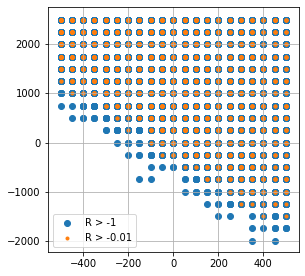

In [68]:
best_rewards = results['Cum Reward'] > -0.01
high_rewards = results['Cum Reward'] > -0.5

plt.figure(figsize=(4.5, 4.5))

x = results.loc[high_rewards, 'x0']
y = results.loc[high_rewards, 'x2']
plt.scatter(x, y, marker='o', label='R > -1')

x = results.loc[best_rewards, 'x0']
y = results.loc[best_rewards, 'x2']
plt.scatter(x, y, marker='.', label='R > -0.01')

plt.legend()
plt.grid()

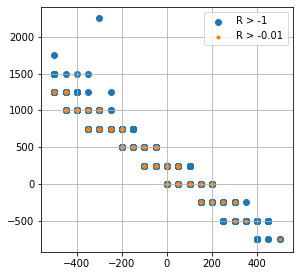

In [69]:
plt.figure(figsize=(4.5, 4.5))

x = results.loc[high_rewards, 'x1']
y = results.loc[high_rewards, 'x3']
plt.scatter(x, y, marker='o', label='R > -1')

x = results.loc[best_rewards, 'x1']
y = results.loc[best_rewards, 'x3']
plt.scatter(x, y, marker='.', label='R > -0.01')

plt.legend()
plt.grid()